In [72]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [73]:
# Loading dataset in the DataFrame 
df = pd.read_csv('../dataset/covid_19_till_19_May_2020.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [74]:
df = df.rename(columns={'Country/Region':'Country', 'Province/State': 'State'}) # rename column name

In [75]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()  

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [76]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,31535.000000,31535.000000,3.153500e+04,31535.000000,31535.000000
mean,21.181891,22.881195,4.809217e+03,320.232218,1439.529761
std,24.904267,70.245542,4.314993e+04,2982.791704,10408.836504
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,1.900000e+01,0.000000,1.000000
75%,41.153300,78.000000,4.370000e+02,6.000000,102.000000
max,71.706900,178.065000,1.528568e+06,91921.000000,289392.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31535 entries, 0 to 31534
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   State      9520 non-null   object        
 1   Country    31535 non-null  object        
 2   Lat        31535 non-null  float64       
 3   Long       31535 non-null  float64       
 4   Date       31535 non-null  datetime64[ns]
 5   Confirmed  31535 non-null  int64         
 6   Deaths     31535 non-null  int64         
 7   Recovered  31535 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.9+ MB


In [78]:
df = df.fillna('NA')
df.head(50)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NA,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NA,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NA,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NA,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NA,Angola,-11.2027,17.8739,2020-01-22,0,0,0
5,NA,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0
6,NA,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0
7,NA,Armenia,40.0691,45.0382,2020-01-22,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31535 entries, 0 to 31534
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   State      31535 non-null  object        
 1   Country    31535 non-null  object        
 2   Lat        31535 non-null  float64       
 3   Long       31535 non-null  float64       
 4   Date       31535 non-null  datetime64[ns]
 5   Confirmed  31535 non-null  int64         
 6   Deaths     31535 non-null  int64         
 7   Recovered  31535 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.9+ MB


In [80]:
df.head(10)

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NA,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NA,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NA,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NA,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NA,Angola,-11.2027,17.8739,2020-01-22,0,0,0
5,NA,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0
6,NA,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0
7,NA,Armenia,40.0691,45.0382,2020-01-22,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0


In [81]:
df2 = df.groupby('Country')[['Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,115615,3211,13641
1,Albania,34319,1408,20212
2,Algeria,183263,19089,76184
3,Andorra,36237,1862,16176
4,Angola,1452,106,383
...,...,...,...,...
183,West Bank and Gaza,17029,95,6333
184,Western Sahara,256,0,144
185,Yemen,1190,190,30
186,Zambia,8987,166,3102


In [82]:
df3 = df2[df2['Confirmed']>20000]
df3

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,115615,3211,13641
1,Albania,34319,1408,20212
2,Algeria,183263,19089,76184
3,Andorra,36237,1862,16176
6,Argentina,203394,9507,57061
...,...,...,...,...
176,Ukraine,426624,11263,71224
177,United Arab Emirates,533805,4633,135136
178,United Kingdom,7344562,1072863,35815
179,Uruguay,31454,632,17517


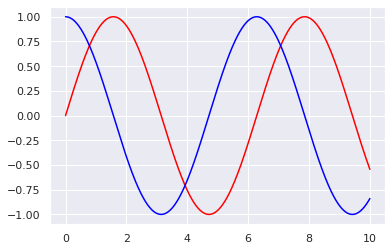

In [83]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)
plt.plot(x, y, color='red')
plt.plot(x, np.cos(x), color='blue')

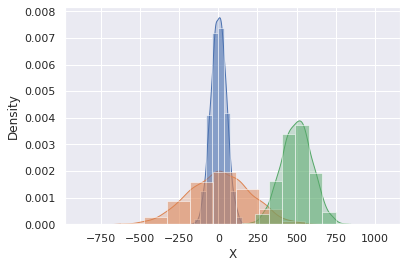

In [93]:
sns.set()
X = pd.Series(50*np.random.randn(5000))
Y = pd.Series(200*np.random.randn(5000))
Z = pd.Series(100*np.random.randn(5000)+500)

data = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
#data.head()

for col in data.columns:
    plt.hist(data[col], density=True, alpha=0.5)
    sns.kdeplot(data[col], shade=True)

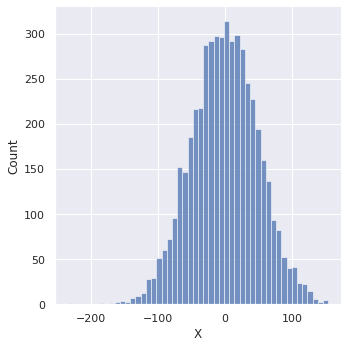

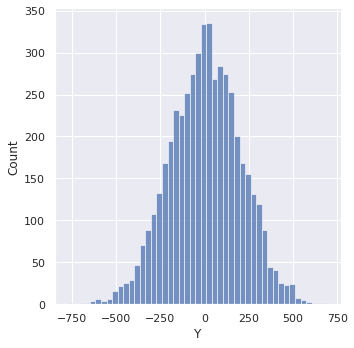

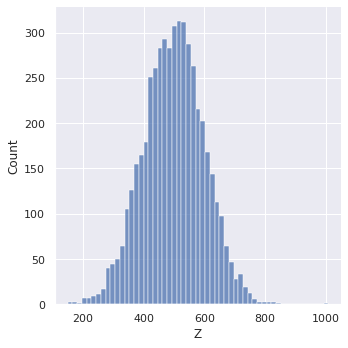

In [94]:
for col in data.columns:
    sns.displot(data[col])

/home/andsilva/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


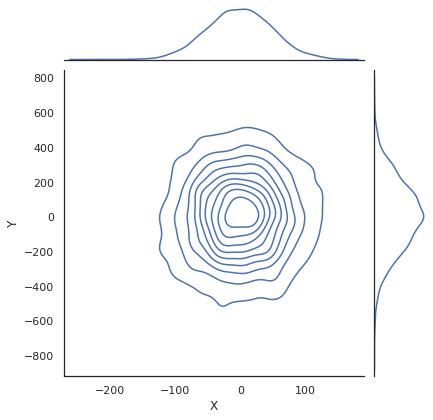

In [96]:
with sns.axes_style('white'):
    sns.jointplot("X", "Y", data, kind='kde')

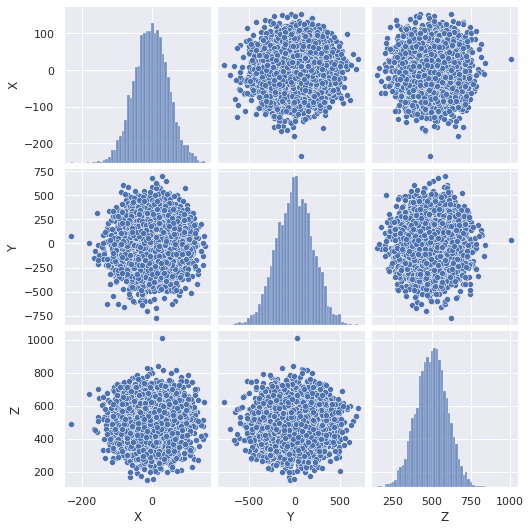

In [97]:
sns.pairplot(data)

In [99]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


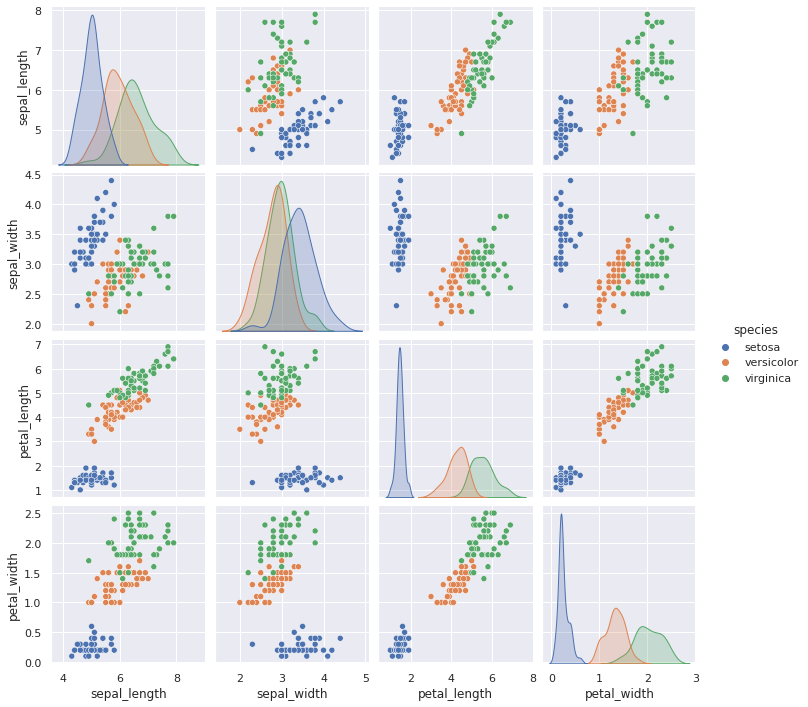

In [100]:
sns.pairplot(iris, hue='species')

In [105]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [113]:
from bokeh.plotting import figure, output_file, show

In [114]:
output_file("demo.html")
p = figure(plot_width=400,plot_height=400,title="line")
p.line([1,2,3,4,5],[6,7,8,9,10],line_width=2)
show(p)

In [121]:
p = figure(plot_width=800, plot_height=800, title="Brokeh Example", x_axis_label='X_value', y_axis_label='Y_value')
x = np.linspace(0, 10, 30)
y1 = np.sin(x)
y2 = np.cos(x)
p.line(x, y1, legend="y=sin(x)")
p.circle(x, x, legend="y=x", fill_color="green", size=5)
p.line(x, y2, legend="y=cos", line_width=3, line_color="red")
p.triangle(x,x**2,color="black")
show(p)

In [123]:
from bokeh.layouts import gridplot

x = np.linspace(0, 6*np.pi, 100)

y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x) - 1

s1 = figure(plot_width=400)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

s2 = figure(plot_width=400)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

s3 = figure(plot_width=400)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

p = gridplot([[s1, s2, s3]])

show(p)